In [1]:
import matplotlib.pyplot as plt
# import random

import numpy as np
from pydub import AudioSegment
import random
import sys
import io
import os
import glob
import IPython
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


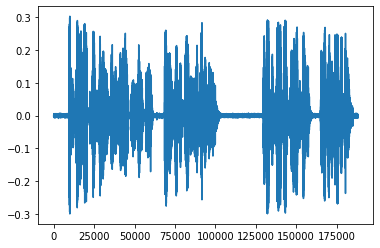

In [5]:
import librosa
import librosa.display
x, r = librosa.load('/home/isro/summer_proj/Conv_bot/LibriSpeech/train-clean-100/19/198/19-198-0001.flac', sr = 16000)
plt.plot(x)

In [8]:
data_directory = "/home/isro/summer_proj/Conv_bot/LibriSpeech"

labels = []
durations = []
keys = []
for group in os.listdir(data_directory):
    speaker_path = os.path.join(data_directory, group)
    if not os.path.isdir(speaker_path):
        continue
    for speaker in os.listdir(speaker_path):
        chapter_path = os.path.join(speaker_path, speaker)
        if not os.path.isdir(chapter_path):
            continue
        for chapter in os.listdir(chapter_path):
            labels_file = os.path.join(chapter_path, chapter,
                                        '{}-{}.trans.txt'
                                        .format(speaker, chapter))
#             print(labels_file)
            for line in open(labels_file):
                split = line.strip().split()
                file_id = split[0]
                label = ' '.join(split[1:]).lower()
                audio_file = os.path.join(chapter_path, chapter,
                                            file_id) + '.flac'
                # audio = wave.open(audio_file)
                # duration = float(audio.getnframes()) / audio.getframerate()
                # audio.close()
                # if float(duration) > max_duration:
                #     continue
                keys.append(audio_file)
                # durations.append(duration)
                labels.append(label)

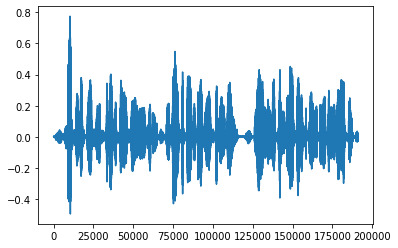

In [30]:
import soundfile as sf
def plot_gen(audio_file):
    x,r= librosa.load(audio_file, sr=16000)
    plt.plot(x)

plot_gen(keys[4])

def noise_inj(data, noise_factor):
    noise = np.random.randn(len(data))
    aug_data=data+noise_factor * noise
    aug_data = aug_data.astype(type(data[0]))
    return aug_data
    
noise inj(keys[4])

In [52]:
def gen_audio(aug_data, sr):
    sf.write("mod_aud.flac", aug_data, sr)
    plot_gen("mod_aud.flac")

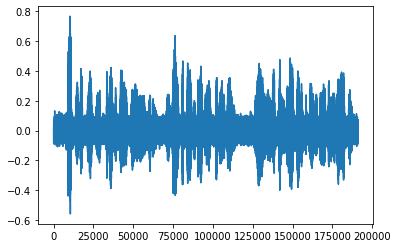

In [53]:
def noise_inj(audio, noise_factor):      #introducing random noise in the audio file
    data, sr =sf.read(audio)
    noise = np.random.randn(len(data)) 
    aug_data=data + noise_factor * noise 
    aug_data = aug_data.astype(type(data[0])) 
#     sf.write("mod_aud.flac", aug_data, sr)
    return gen_audio(aug_data, sr)
    

noise_inj(keys[4], 0.03)

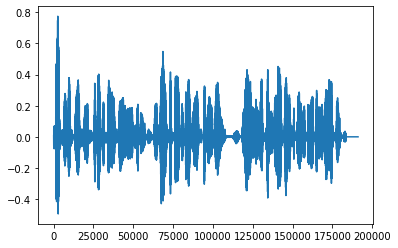

In [61]:
def shift_time(audio, shift_max, shift_dir):    #shifting to the right
    data, sr= sf.read(audio)
    shift = np.random.randint(sr*shift_max)
    if shift_dir=="right":
        shift=-shift
    elif self.shift_dir=="both":
        direction = np.random.randint(0,2)
        if direciton==1:
            shift=-shift
            
    aug_data = np.roll(data, shift)
    if shift>0:
        aug_data[:shift]=0
    else:
        aug_data[shift:]=0
    return gen_audio(aug_data,sr)

shift_time(keys[4], 1, "right")

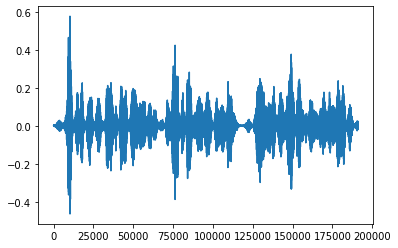

In [68]:
def change_pitch(audio, pitch_factor):
    data,sr=sf.read(audio)
    return gen_audio(librosa.effects.pitch_shift(data, sr, pitch_factor),sr)

change_pitch(keys[4],0.5)